In [ ]:
# This file has been used with Python version 3.12.4. To execute it, the required packages must be installed by the user
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
from scipy.stats import gaussian_kde
import random

# Define function for centred log ratio based
def clr(compositional_data):
    geom_mean = np.power(np.prod(compositional_data,axis=1),1/len(compositional_data.columns)) # calculate the geometric mean  
    clr_x = np.log(compositional_data.div(geom_mean,axis=0)) # divide each element by the geometric mean and take the log
    return clr_x

def filter_bivariate_density(data, x_col, y_col, percentage):

    data = data.reset_index(drop=True)

    # Next step, filter individual elements
    
    kde = gaussian_kde(data[[x_col, y_col]].T)
    
    xmin, xmax = data[x_col].min() - 1, data[x_col].max() + 1
    ymin, ymax = data[y_col].min() - 1,  data[y_col].max() + 1
    
    # Create grid for evaluation
    X, Y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde(positions).reshape(X.shape)
    
    # Calculate the 90% probability density threshold
    Z_flat = Z.ravel()
    Z_sorted = np.sort(Z_flat)[::-1]
    cumulative_density = np.cumsum(Z_sorted)
    cumulative_density /= cumulative_density[-1]  # Normalize to make it a probability
    threshold_index = np.argmax(cumulative_density >= percentage)
    threshold_value = Z_sorted[threshold_index]
    
    # fig, ax = plt.subplots(1,1, figsize = (4,4))
    # Create an offscreen figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Plot the KDE with the 90% density contour
    contour = plt.contour(X, Y, Z, levels=[threshold_value], colors='red')

    # Extract the path of the first contour
    path = contour.collections[0].get_paths()[0]
    
    plt.close(fig)
    # Filter the dataset
    points = data[[x_col, y_col]].values  # Combine x and y into an (N, 2) array
    inside_mask = path.contains_points(points)

    # print(data[inside_mask])
    
    # Get the indexes of the filtered data
    indexes_inside = data[inside_mask].index  # Indexes of rows inside the contour
    indexes_outside = data[~inside_mask].index  # Indexes of rows outside the contour
  
    # Create new filtered DataFrames (optional)
    filtered_data = data.loc[indexes_inside]  # Data inside the contour
    outliers = data.loc[indexes_outside]  # Data outside the contour

    return filtered_data, outliers, path

def filter_bivariate_density_test(data, x_col, y_col, test, percentage):

    # Function to generate data which is filtered within the 90% contour
    
    data = data.reset_index(drop=True)

    # Next step, filter individual elements
    
    kde = gaussian_kde(data[[x_col, y_col]].T)
    
    xmin, xmax = data[x_col].min() - 1, data[x_col].max() + 1
    ymin, ymax = data[y_col].min() - 1,  data[y_col].max() + 1
    
    # Create grid for evaluation
    X, Y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = kde(positions).reshape(X.shape)
    
    # Calculate the 90% probability density threshold
    Z_flat = Z.ravel()
    Z_sorted = np.sort(Z_flat)[::-1]
    cumulative_density = np.cumsum(Z_sorted)
    cumulative_density /= cumulative_density[-1]  # Normalize to make it a probability
    threshold_index = np.argmax(cumulative_density >= percentage)
    threshold_value = Z_sorted[threshold_index]
    
    # fig, ax = plt.subplots(1,1, figsize = (4,4))
    # Create an offscreen figure
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Plot the KDE with the 90% density contour
    contour = plt.contour(X, Y, Z, levels=[threshold_value], colors='red')

    # Extract the path of the first contour
    path = contour.collections[0].get_paths()[0]
    
    plt.close(fig)
    # Filter the dataset
    points = test[[x_col, y_col]].values  # Combine x and y into an (N, 2) array
    inside_mask = path.contains_points(points)

    # print(data[inside_mask])
    
    # Get the indexes of the filtered data
    indexes_inside = test[inside_mask].index  # Indexes of rows inside the contour
    indexes_outside = test[~inside_mask].index  # Indexes of rows outside the contour
  
    # Create new filtered DataFrames (optional)
    filtered_data = test.loc[indexes_inside]  # Data inside the contour
    outliers = test.loc[indexes_outside]  # Data outside the contour

    return filtered_data, outliers

# Function for fitting regressions
def fit_data(column, dataframe, order, sio2):
    fit, cov = np.polyfit(dataframe['SIO2(WT%)'], dataframe[column], order, cov = True)
    f = np.poly1d(fit)
    x_test = sio2
    pcov_sigma = np.sqrt(np.diag(cov))

    return f(x_test), fit



/var/folders/pf/__j8h2d157772zgzy8kkpjr80000gp/T/ipykernel_7111/2319217886.py:50: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  path = contour.collections[0].get_paths()[0]
/var/folders/pf/__j8h2d157772zgzy8kkpjr80000gp/T/ipykernel_7111/2319217886.py:50: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  path = contour.collections[0].get_paths()[0]
/var/folders/pf/__j8h2d157772zgzy8kkpjr80000gp/T/ipykernel_7111/2319217886.py:50: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  path = contour.collections[0].get_paths()[0]
/var/folders/pf/__j8h2d157772zgzy8kkpjr80000gp/T/ipykernel_7111/2319217886.py:50: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  path = contour.collections[0].get_paths()[0]
/var/folders

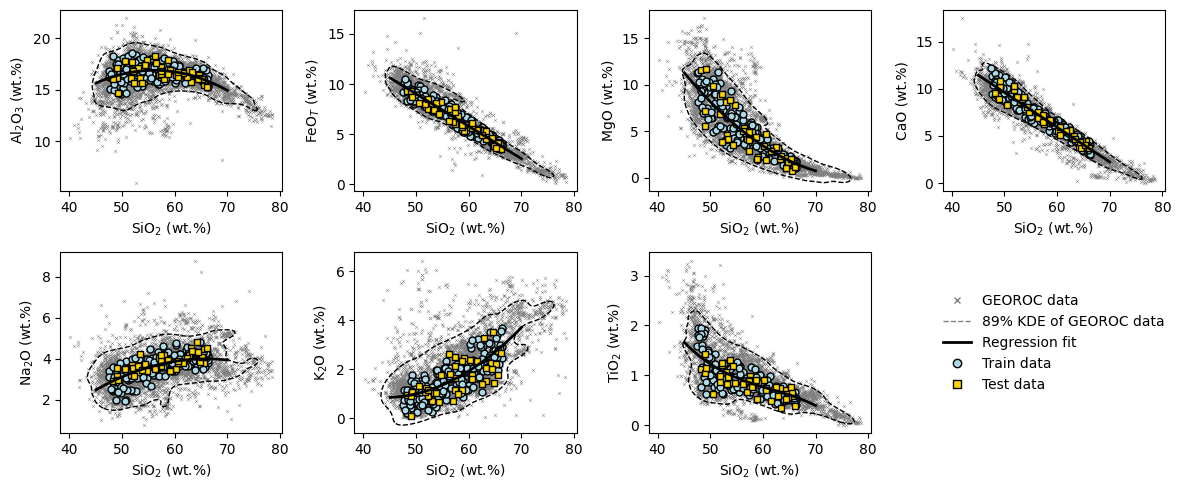

Hash of filtered data: 491976729993569256
Hash of new data: 1253797485601742119
Train first row hash: 260469813947142923


In [156]:
# Set random seeds
seed = 42
np.random.seed(seed)
random.seed(seed)

data = pd.read_csv('ArcMagmaCompilation.csv')

# Generate training data

min_sio2 = 45
max_sio2 = 70
sio2_all = np.sort(np.random.uniform(min_sio2,max_sio2,2000)) # Range to fit the regressions to in SiO2 space
density_pct = 0.89 # fraction for the density contours

data_size = 240 # Size of dataset
split = 0.8 # trai/test split

# Make axes
fig, axs = plt.subplots(2,4, figsize = (12,5))
axr = axs.flatten()
ax = 0
outliers_all = []

# Isolate the 90% contour of all the arc magma compilation
for col in data.columns:

    if col != 'SIO2(WT%)':
        axr[ax].scatter(data['SIO2(WT%)'], data[col], s = 6, marker = 'x', color = 'gray', linewidths = 0.3)

        data_within_contour, outliers, path = filter_bivariate_density(data, 'SIO2(WT%)', col, density_pct)
        outliers_all.extend(outliers.index)

        # axr[ax].scatter(data_within_90_contour['SIO2(WT%)'], data_within_90_contour[col], s = 25, color = 'white', edgecolor = 'black')
        axr[ax].set_xlabel('SiO2 (wt.%)')
        axr[ax].set_ylabel(col)

        # Extract the vertices from the contour path
        vertices = path.vertices
        x_path, y_path = vertices[:, 0], vertices[:, 1]
        
        # Plot the path manually
        axr[ax].plot(x_path, y_path, color='black', linewidth=1, linestyle = 'dashed')

        
        ax = ax + 1

# Remove the outliers
outliers_index = np.unique(np.array(outliers_all))
data_within_contour = data.reset_index(drop=True).drop(outliers_index, axis = 0) # the filtered data

# Fit appropriate regression on the 90% data and fit to the training data sio2
al2o3_all = fit_data('AL2O3(WT%)', dataframe = data_within_contour, order=2, sio2 = sio2_all)[0]
feo_all = fit_data('FEOT(WT%)', dataframe = data_within_contour, order=1, sio2 = sio2_all)[0]
mgo_all = fit_data('MGO(WT%)', dataframe = data_within_contour, order=2, sio2 = sio2_all)[0]
cao_all = fit_data('CAO(WT%)', dataframe = data_within_contour, order=1, sio2 = sio2_all)[0]
na2o_all = fit_data('NA2O(WT%)', dataframe = data_within_contour, order=2, sio2 = sio2_all)[0]
k2o_all = fit_data('K2O(WT%)', dataframe = data_within_contour, order=2, sio2 = sio2_all)[0]
tio2_all = fit_data('TIO2(WT%)', dataframe = data_within_contour, order=3, sio2 = sio2_all)[0]

elements_all = [al2o3_all, feo_all, mgo_all, cao_all, na2o_all, k2o_all, tio2_all]
element_names = data_within_contour.columns[1:]
new_elements_all = []

n = 0
# Loop through the sio2, calculate an sio2 range and apply the standard deviation from the real data
for sio2 in sio2_all:
    subset = data_within_contour[(data_within_contour['SIO2(WT%)'] > sio2-1) & (data_within_contour['SIO2(WT%)'] < sio2+1)] # Generate subset window of 1% for this siO2
    new_elements = dict()
    
    for element, element_name in zip(elements_all, element_names):
        new_elements[element_name] = np.random.normal(element[n], subset[element_name].std(), 1)[0]
    new_elements_all.append(new_elements)
    
    n = n + 1

new_elements_all = pd.DataFrame(new_elements_all)
new_elements_all.insert(0, 'SIO2(WT%)', sio2_all)


# Plot regression curves
axr[0].plot(sio2_all,fit_data('AL2O3(WT%)', dataframe = data_within_contour, order=2, sio2 = sio2_all)[0], c='black', linewidth = 2, zorder = 500)
axr[1].plot(sio2_all,fit_data('FEOT(WT%)', dataframe = data_within_contour, order=1, sio2 = sio2_all)[0], c='black', linewidth = 2, zorder = 500)
axr[2].plot(sio2_all,fit_data('MGO(WT%)', dataframe = data_within_contour, order=2, sio2 = sio2_all)[0], c='black', linewidth = 2, zorder = 500)
axr[3].plot(sio2_all,fit_data('CAO(WT%)', dataframe = data_within_contour, order=1, sio2 = sio2_all)[0], c='black', linewidth = 2, zorder = 500)
axr[4].plot(sio2_all,fit_data('NA2O(WT%)', dataframe = data_within_contour, order=2, sio2 = sio2_all)[0], c='black', linewidth = 2, zorder = 500)
axr[5].plot(sio2_all,fit_data('K2O(WT%)', dataframe = data_within_contour, order=2, sio2 = sio2_all)[0], c='black', linewidth = 2, zorder = 500)
axr[6].plot(sio2_all,fit_data('TIO2(WT%)', dataframe = data_within_contour, order=3, sio2 = sio2_all)[0], c='black', linewidth = 2, zorder = 500)


# Now filter the data so it all lies within the % contour
outliers = []
for column in new_elements_all.columns[1:]:
    outlier_index = filter_bivariate_density_test(data_within_contour, 'SIO2(WT%)', column, new_elements_all, density_pct)[1].index
    outliers.append(outlier_index)

outliers = [item for outliers in outliers for item in outliers]
new_elements_all = new_elements_all.drop(index=outliers).reset_index(drop=True)

# # Sample test data from the dataframe
# test = new_elements_all.sample(n=int(data_size*split), random_state=seed)
# new_elements_all =new_elements_all.drop(test.index) # delete test data from what will become training data

# Ensure constant number of samples per SiO2 content
new_elements_all['SiO2_rounded'] = new_elements_all['SIO2(WT%)'].round().astype(int) # Round SiO2 to the nearest integer for grouping
samples_per_group = int(data_size/(np.max(new_elements_all['SIO2(WT%)']) - np.min(new_elements_all['SIO2(WT%)']))) # Samples per SiO2
# Group by the rounded SiO2 and sample equal numbers from each SiO2
new_elements_all = (
    new_elements_all.groupby('SiO2_rounded', group_keys=False)
      .apply(lambda x: x.sample(n=samples_per_group, random_state=42) if len(x) >= samples_per_group else pd.DataFrame())
)

new_elements_all = new_elements_all.drop('SiO2_rounded', axis = 1).reset_index(drop=True) # drop redundant column
new_elements_all = new_elements_all.sample(frac=1, random_state=seed).reset_index(drop=True) # shuffle for random split

# Split the sampled rows into two DataFrames of 80/20 split each without replacement
train = new_elements_all.iloc[:int(len(new_elements_all)*split)].reset_index(drop=True)
test = new_elements_all.iloc[int(len(new_elements_all)*split):].reset_index(drop=True)

# Plot the data
n = 0
for column in train.columns[1:]:
    axr[n].scatter(train['SIO2(WT%)'], train[column], color = 'lightblue', edgecolor = 'black', s = 25, zorder = 50)
    axr[n].set_xlabel('SiO$_{2}$ (wt.%)')
    n = n + 1

# Plot the data
n = 0
for column in test.columns[1:]:
    axr[n].scatter(test['SIO2(WT%)'], test[column], color = 'gold', marker = 's', edgecolor = 'black', s = 25, zorder = 100)
    axr[n].set_xlabel('SiO$_{2}$ (wt.%)')
    n = n + 1

axr[0].set_ylabel('Al$_{2}$O$_{3}$ (wt.%)')
axr[1].set_ylabel('FeO$_{T}$ (wt.%)')
axr[2].set_ylabel('MgO (wt.%)')
axr[3].set_ylabel('CaO (wt.%)')
axr[4].set_ylabel('Na$_{2}$O (wt.%)')
axr[5].set_ylabel('K$_{2}$O (wt.%)')
axr[6].set_ylabel('TiO$_{2}$ (wt.%)')

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Custom legend handles
legend_elements = [
    Line2D([0], [0], marker='x', color='gray', linestyle='None', markersize=4, label='GEOROC data'),
    Line2D([0], [0], color='gray', linewidth=1, linestyle = 'dashed', label='89% KDE of GEOROC data'),
        Line2D([0], [0], color='black', linewidth=2, label='Regression fit'),
    Line2D([0], [0], marker='o', color='lightblue', markeredgecolor='black', linestyle='None', markersize=6, label='Train data'),
    Line2D([0], [0], marker='s', color='gold', markeredgecolor='black', linestyle='None', markersize=6, label='Test data'),
    
]

# Place the legend in the empty 8th subplot (axr[7])
axr[7].legend(handles=legend_elements, loc='center', frameon=False)
axr[7].axis('off')  # Keep it blank besides the legend

plt.tight_layout()
plt.savefig('Data_Generation.png', dpi = 1200)
plt.show()

print("Hash of filtered data:", hash(pd.util.hash_pandas_object(data_within_contour).sum()))
print("Hash of new data:", hash(pd.util.hash_pandas_object(new_elements_all).sum()))
print("Train first row hash:", hash(pd.util.hash_pandas_object(train.iloc[0]).sum()))

In [158]:
test.to_csv('test_data.csv', index = False)
train.to_csv('train_data.csv', index = False)